## Homework #14.1 - Feature Engineering

### Overview:
Feature engineering refers to using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive
model using machine learning or statistical modeling.

### Task:
For this chapter, you will have to do the following:
* Using Feature Engineering try the algorithms you discovered and
apply them to the previous Data Sets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imperio import BoxCoxTransformer, ZCATransformer, TargetImputationTransformer
from sklearn.datasets import load_iris, load_diabetes
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, OneHotEncoder, LabelEncoder, \
    OrdinalEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Dataset 1: Iris Dataset

In [2]:
iris_dataset: pd.DataFrame = load_iris(as_frame=True).frame

In [3]:
iris_dataset.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
iris_dataset.tail(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### Feature Scaling
This technique is primarily used to bring numerical data of different features in comparable ranges and at comparable scale. There are 2 main algorithms that offers this
possibility:
1. Normalization - (a.k.a. Min-Max Scaling) is the process of bringing
all features values between 0 and 1. This can be achieved by subtracting
the min vector (the vector with the smallest values in each column) from
the feature vector. This result then is divided by the difference between
the max vector (the vector with the biggest values in each column) and
the min vector, or just by applying the following formula:
$$
x^{'} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$
2. Standardization - is the process of bringing the data between -3 and
3 or, saying in another way bringing the numerical series to a series with
the mean equal to 0 and standard deviation equal to 1. This is done by
applying the following formula:
$$
x^{'} = \frac{x-\mu}{\sigma}
$$

In [5]:
iris_dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
X_features = iris_dataset.drop(columns=['target'])
y_target = iris_dataset['target']

In [8]:
X_features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y_target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=.2, random_state=42)

In [11]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [12]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


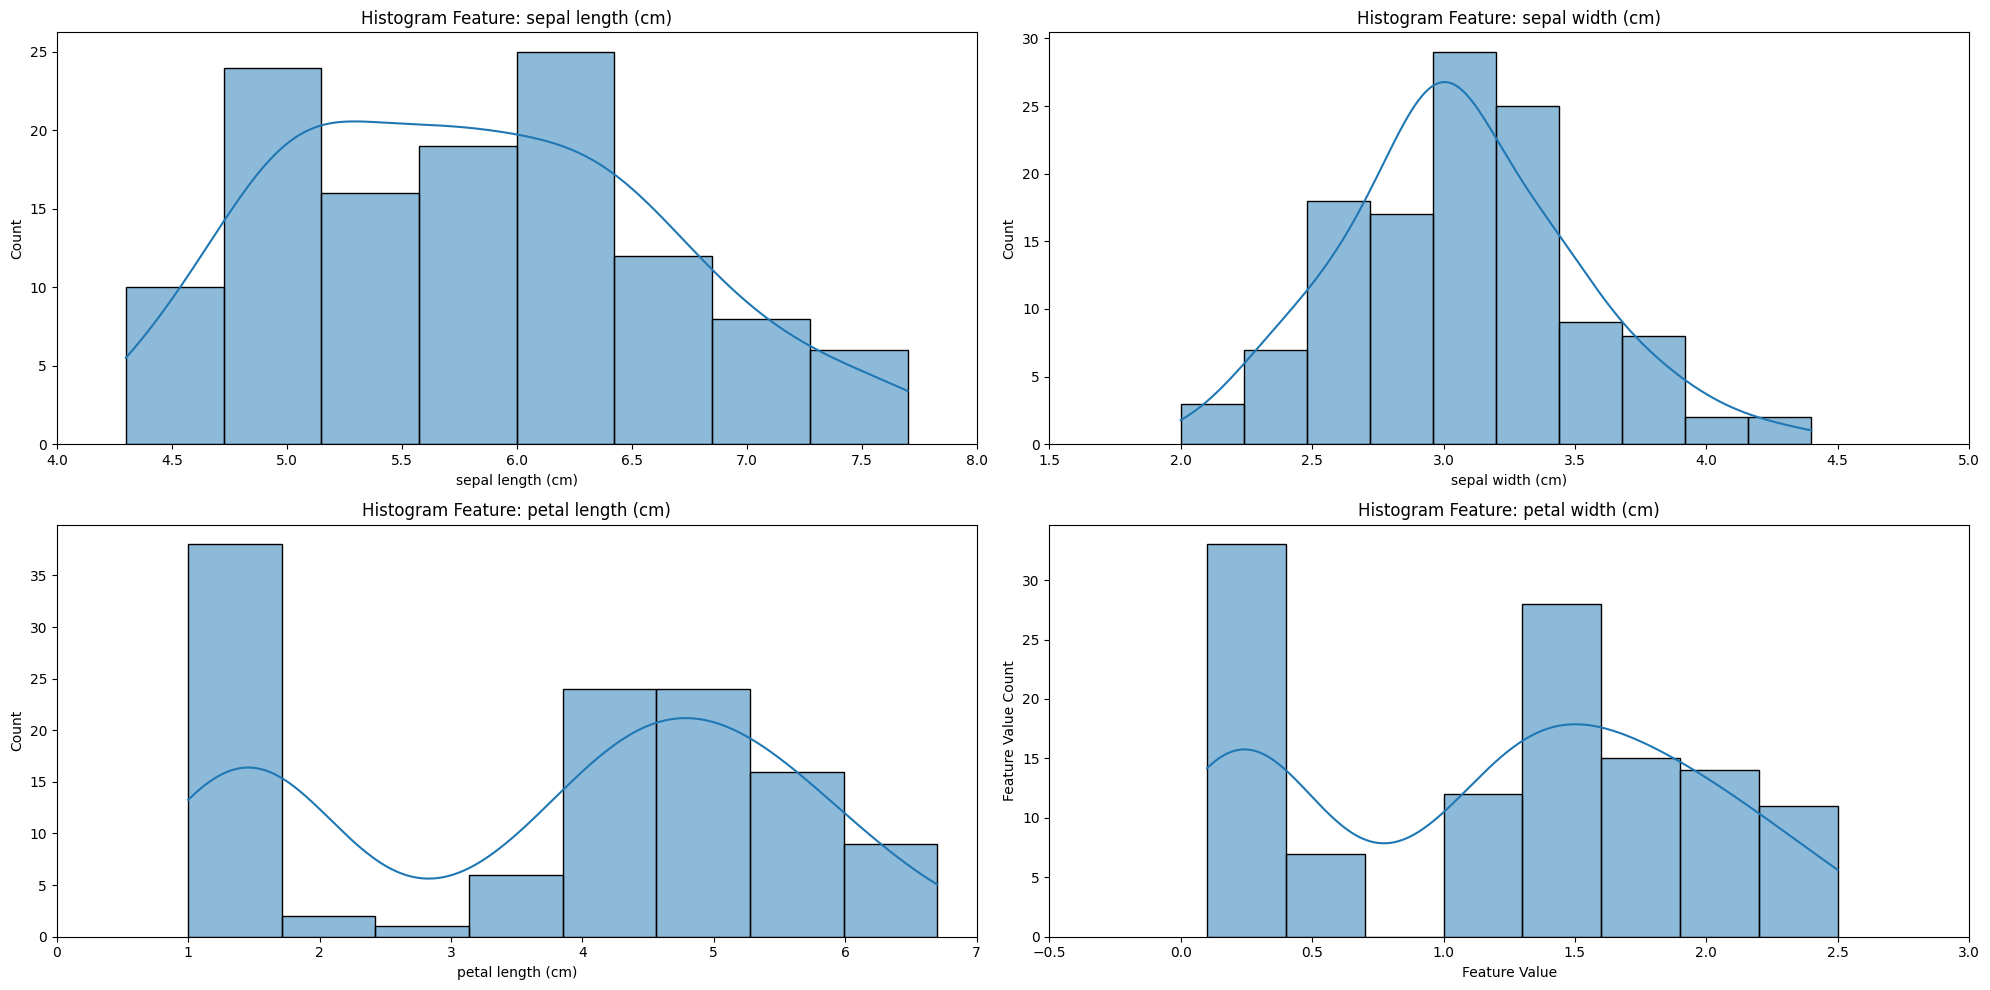

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
features = X_train.columns

for i, feature in enumerate(features):
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index][col_index]

    sns.histplot(data=pd.concat([X_train, y_train], axis=1), x=feature, ax=ax, kde=True)
    ax.set_title(f'Histogram Feature: {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Count')
    ax.set_xticks(ax.get_xticks())

plt.xlabel("Feature Value")
plt.ylabel("Feature Value Count")
plt.tight_layout()
plt.show()

Steps for Training a Machine Learning Model:
1. Missing Values Imputation,
2. Feature Encoding,
3. Feature Scaling,
4. Feature Selection,
5. ML Model Training.

In [14]:
dataset_pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('model', LogisticRegression())
    ]
)

#### Classification Report Description:
1. Precision - the ratio of the correctly predicted class to the total predicted class.
$$
\begin{gather*}
Precision = \frac{TP}{TP + FP} \\
TP \text{ - True Positives} \\
FP \text{ - False Positives}
\end{gather*}
$$
2. Recall - the ratio of correctly predicted class to all data in the actual class.
$$
\begin{gather*}
Recall = \frac{TP}{TP + FN} \\
TP \text{ - True Positives} \\
FN \text{ - False Negatives}
\end{gather*}
$$
3. F1 Score - a harmonic means between the Precision and Recall score.
$$
\begin{gather*}
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
\end{gather*}
$$
4. Support - Actual Instances for each class. In other words, the actual number of data points belonging to each class.
5. Accuracy score - the overall accuracy score for the classifier gives a general idea of the model's performance but can be misleading as it considers every correct
prediction for all classes.
$$
\begin{gather*}
Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \\
TP \text{ - True Positives} \\
TN \text{ - True Negatives} \\
FP \text{ - False Positives} \\
FN \text{ - False Negatives}
\end{gather*}
$$
6. Macro Average - is straight to the point where it takes the average of each metric for all the classes.
$$
\text{Macro Average} = \frac{1}{N} \sum_{i=1}^N \left( \text{Metric for $class_i$} \right)
$$
7. Weighted Average - is a bit more complex as it considers the support in the calculation. Is a better measurement when we have an Imbalance Case
$$
\text{Weighted Average} = \frac{1}{\text{Total Support}} \sum_{i=1}^N \left( \text{Support of $class_i$} \times \text{Metric for $class_i$} \right)
$$

In [15]:
dataset_pipeline.fit(X_train, y_train)
y_hat = dataset_pipeline.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



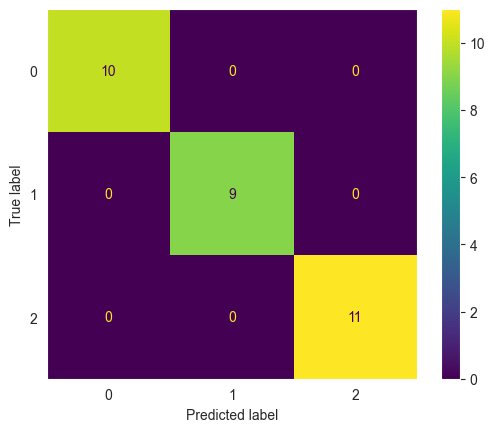

In [16]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

### Housing Prices Dataset

In [17]:
housing_data = pd.read_csv('dataset/HousingData.csv')

In [18]:
housing_data.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [19]:
housing_data.tail(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [20]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [21]:
print(housing_data.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [22]:
X_features, y_target = housing_data.drop(columns=['MEDV']), housing_data['MEDV']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=.2, random_state=42)

In [24]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,NaN,6.06,0.0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,NaN,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [25]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,NaN,0.0,0.510,6.416,NaN,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86


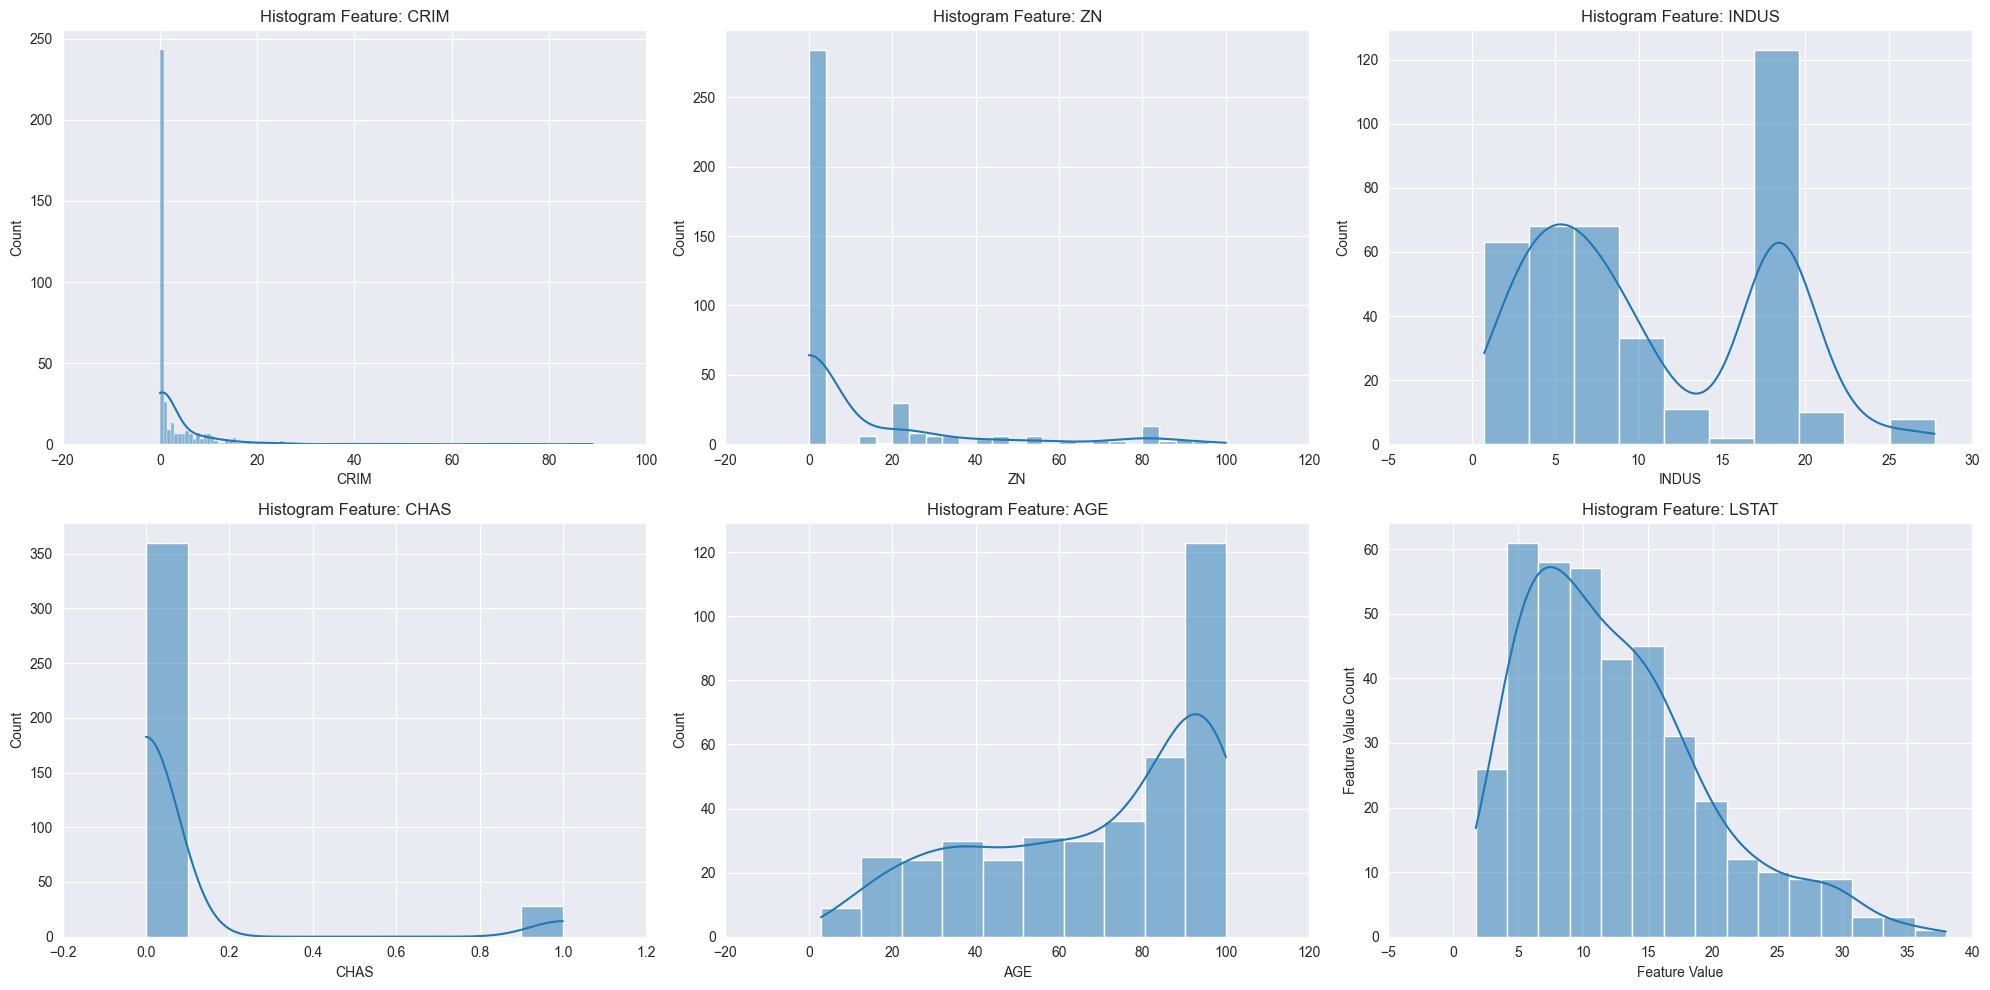

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
features = X_train.columns[X_train.isnull().any()]

for i, feature in enumerate(features):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index][col_index]

    sns.histplot(data=pd.concat([X_train, y_train], axis=1), x=feature, ax=ax, kde=True)
    ax.set_title(f'Histogram Feature: {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Count')
    ax.set_xticks(ax.get_xticks())

plt.xlabel("Feature Value")
plt.ylabel("Feature Value Count")
plt.tight_layout()
plt.show()

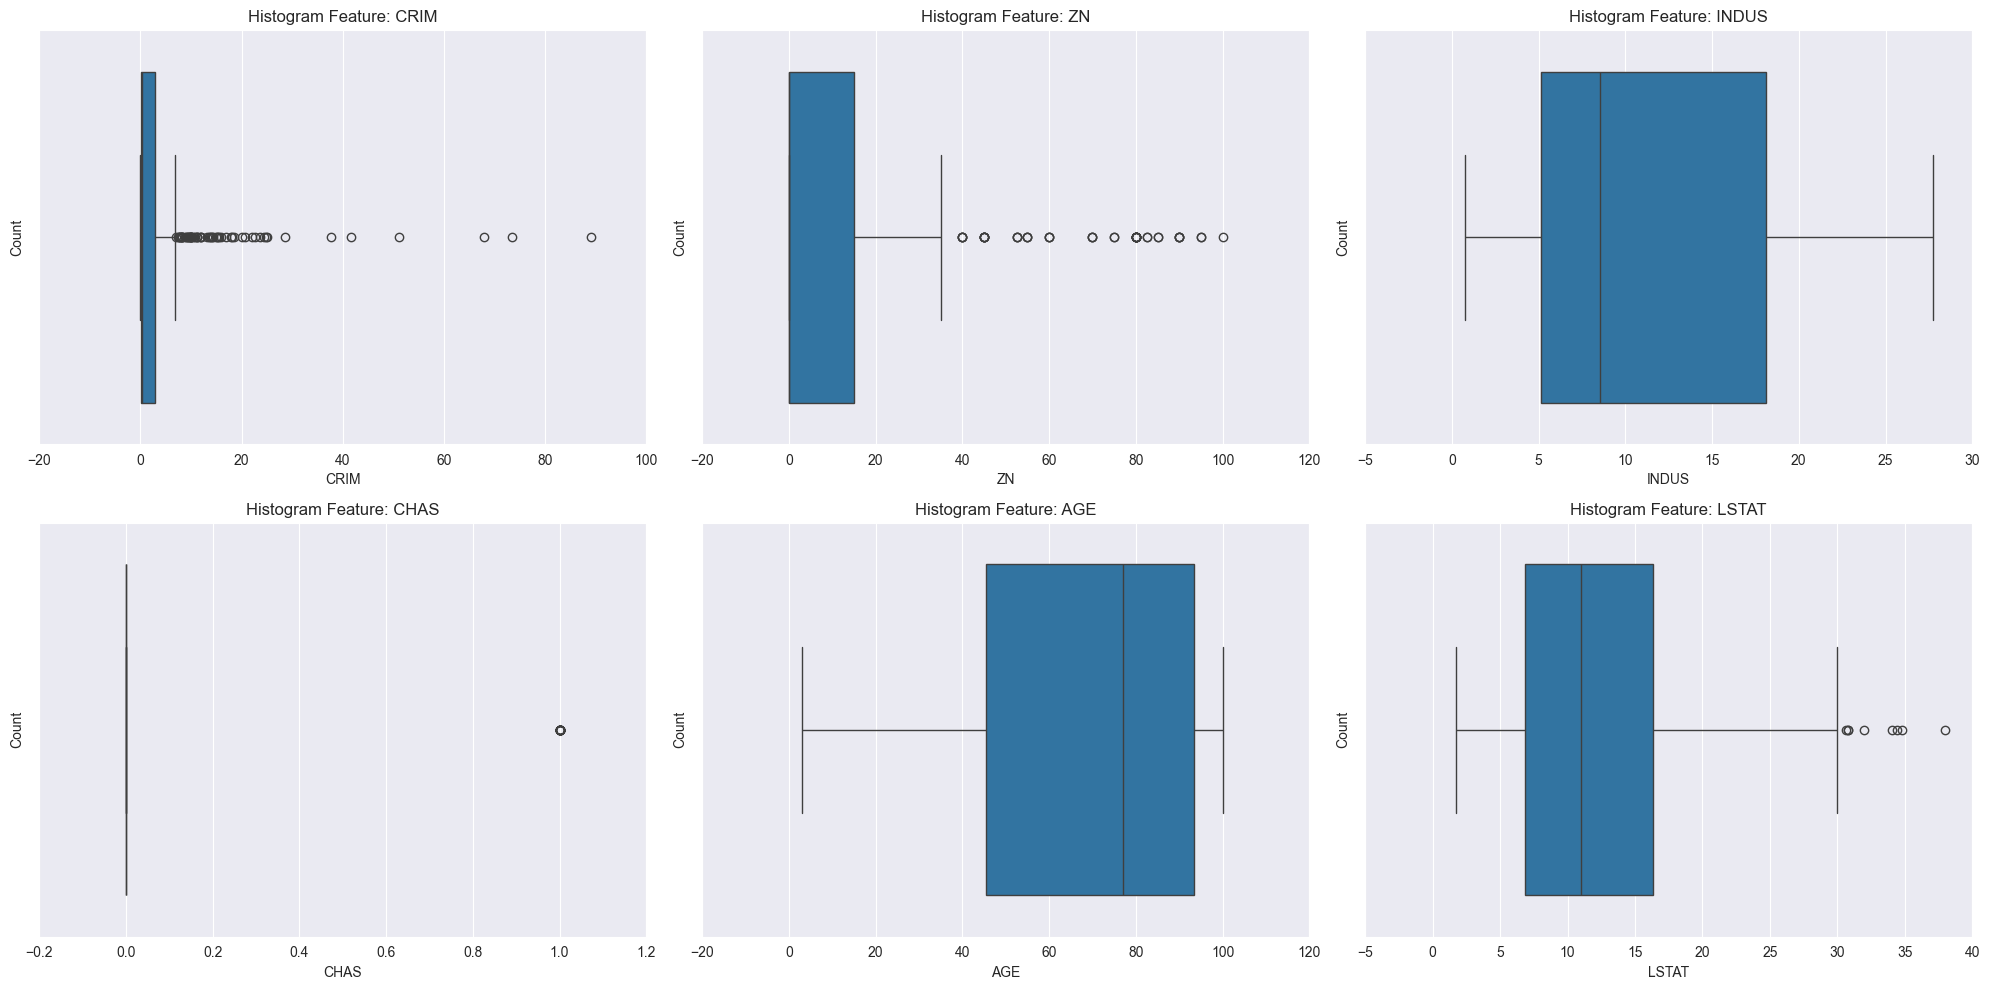

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
features = X_train.columns[X_train.isnull().any()]

for i, feature in enumerate(features):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index][col_index]

    sns.boxplot(data=pd.concat([X_train, y_train], axis=1), x=feature, ax=ax)
    ax.set_title(f'Histogram Feature: {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Count')
    ax.set_xticks(ax.get_xticks())
plt.tight_layout()
plt.show()

In [39]:
column_transformer = ColumnTransformer(
    transformers=[
        ('median_imputer', SimpleImputer(strategy='median'), ['CRIM', 'CHAS', 'ZN', 'LSTAT']),
        ('mean_imputer', SimpleImputer(strategy='mean'), ['INDUS', 'AGE'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [44]:
dataset_pipeline = Pipeline(
    steps=[
        ('imputers', column_transformer.set_output(transform='default')),
        ('box_cox', BoxCoxTransformer()),
        # ('scaler', MinMaxScaler().set_output(transform='default')),
        ('model', LinearRegression())
    ]
)

In [45]:
dataset_pipeline.fit(X=X_train, y=y_train)
y_hat = dataset_pipeline.predict(X=X_test)
print(f'MSE: {mean_squared_error(y_true=y_test.to_numpy(), y_pred=y_hat)}')

MSE: 21.702928012376827


### Diabetes Dataset

In [46]:
diabetes_dataset = load_diabetes(as_frame=True).frame
# diabetes_dataset = pd.read_csv('dataset/diabetes.csv')

In [47]:
diabetes_dataset.head(n=10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [48]:
diabetes_dataset.tail(n=10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
432,0.009016,-0.044642,0.055229,-0.005670,0.057597,0.044719,-0.002903,0.023239,0.055686,0.106617,173.0
433,-0.027310,-0.044642,-0.060097,-0.029770,0.046589,0.019980,0.122273,-0.039493,-0.051404,-0.009362,72.0
434,0.016281,-0.044642,0.001339,0.008101,0.005311,0.010899,0.030232,-0.039493,-0.045424,0.032059,49.0
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357,64.0
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641,48.0
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [49]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [50]:
print(diabetes_dataset.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [51]:
X_features, y_target = diabetes_dataset.drop(columns=['target']), diabetes_dataset['target']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=.3, random_state=42)

In [53]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
225,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907
118,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912
114,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775
364,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333
...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


In [54]:
X_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646
321,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054
73,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005142,-0.009362
...,...,...,...,...,...,...,...,...,...,...
238,0.034443,0.050680,-0.009439,0.059744,-0.035968,-0.007577,-0.076536,0.071210,0.011011,-0.021788
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042571,-0.005220
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
401,0.016281,-0.044642,-0.045007,-0.057313,-0.034592,-0.053923,0.074412,-0.076395,-0.042571,0.040343


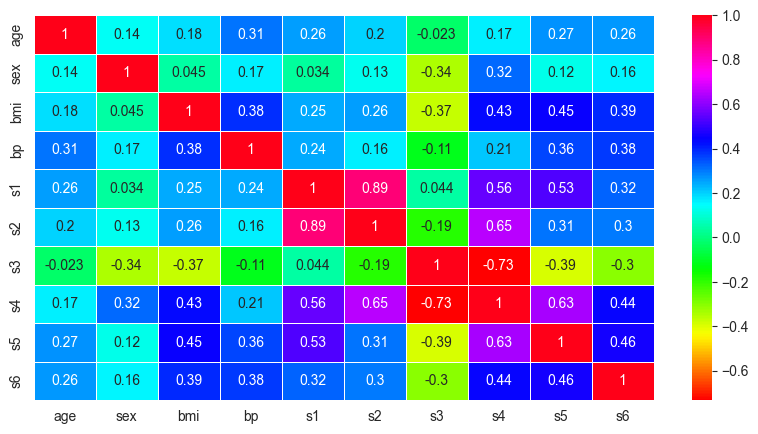

In [55]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=X_train.corr(), annot=True, linewidths=0.5, cbar=True, cmap='hsv')
plt.show()

In [74]:
corr_matrix = X_train.corr()
mask = np.tril(np.ones(corr_matrix.shape), k=0).astype(bool)
filtered_corr = corr_matrix.where(~mask)
high_corr = abs(filtered_corr[abs(filtered_corr) > 0.6].stack()).sort_values(ascending=False)
print(high_corr)
high_corr_index = [index for index, column in enumerate(X_train.columns) if column in high_corr]
print(high_corr_index)

s1  s2    0.891476
dtype: float64
[4]


In [80]:
dataset_pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler().set_output(transform='default')),
        ('zca', ZCATransformer(index=high_corr_index)),
        ('model', LinearRegression())
    ]
)

In [30]:
dataset_pipeline.fit(X=X_train.to_numpy(), y=y_train)
y_hat = dataset_pipeline.predict(X=X_test.to_numpy())
print(f"Mean Squared Error of Linear Regression: {mean_squared_error(y_true=y_test, y_pred=y_hat)}")

ValueError: Specifying the columns using strings is only supported for dataframes.

### Telco Customer Dataset

In [2]:
telco_dataset = pd.read_csv('dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco_dataset.head(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
telco_dataset.tail(n=10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
telco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print(telco_dataset.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
frequency_columns = []
one_hot_columns = []
for column in telco_dataset.columns:
    if telco_dataset[column].dtype == 'object':
        print(f'{column}: {telco_dataset[column].unique()}')
        if len(telco_dataset[column].unique()) == 2:
            one_hot_columns.append(column)
        else:
            frequency_columns.append(column)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [8]:
X_features, y_target = telco_dataset.drop(columns=['Churn']), telco_dataset['Churn']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=.2, random_state=42)

In [10]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1623,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [11]:
X_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,2845-KDHVX,Female,0,Yes,No,64,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,68.30,4378.8
315,5027-YOCXN,Male,0,Yes,Yes,51,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),110.05,5686.4
2439,8884-MRNSU,Male,0,Yes,Yes,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.90,329.75
5002,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1


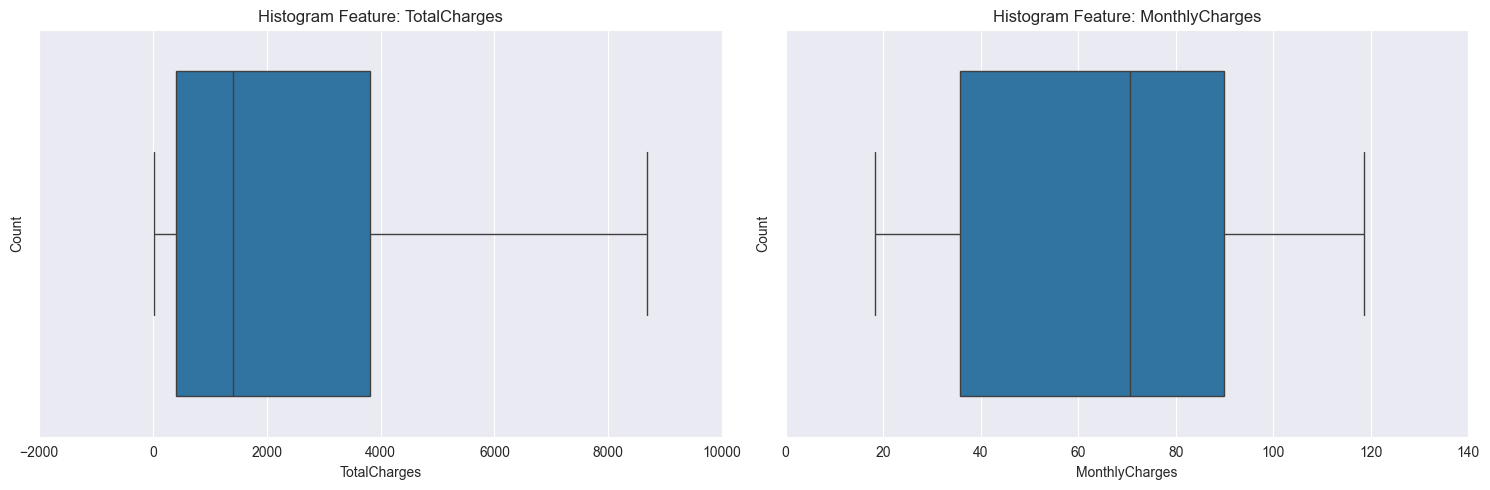

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
features = ['TotalCharges', 'MonthlyCharges']

for i, feature in enumerate(features):
    col_index = i % 2
    ax = axes[col_index]

    if feature == 'TotalCharges':
        sns.boxplot(data=pd.concat([X_train, y_train], axis=1), x=pd.to_numeric(X_train[feature], errors='coerce'), ax=ax)
    else:
        sns.boxplot(data=pd.concat([X_train, y_train], axis=1), x=feature, ax=ax)
    ax.set_title(f'Histogram Feature: {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Count')
    ax.set_xticks(ax.get_xticks())
plt.tight_layout()
plt.show()

In [13]:
one_hot_features = [feature for feature in one_hot_columns if feature != 'Churn']
one_hot_features

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [14]:
frequency_features = [feature for feature in frequency_columns if feature not in ['customerID', 'TotalCharges']]
frequency_features

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [30]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

features_to_drop = ['customerID']
features_to_convert = ['TotalCharges']

convertor = FunctionTransformer(lambda x: pd.to_numeric(x.iloc[:, 0], errors='coerce').to_frame(), validate=False)

convert_and_impute_pipeline = Pipeline(
    steps=[
        ('convert', convertor),
        ('impute', SimpleImputer(strategy='mean')),
    ]
)

column_transformer = ColumnTransformer(
    transformers=[
        ('drop', 'drop', features_to_drop),
        ('one_hot_encode', OneHotEncoder(drop='first', sparse_output=False), one_hot_features),
        ('convert_and_impute', convert_and_impute_pipeline, features_to_convert),
        ('multiclass_encode', OrdinalEncoder(), frequency_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
)


dataset_pipeline = Pipeline([
    ('transform', column_transformer),
    ('scaler', StandardScaler()),
    # ('pca', PCA()),
    # ('frequency_encoding', TargetImputationTransformer(index=[i for i in range(8, 18)])),
    ('model', SVC(kernel='rbf'))
])

In [31]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y=y_train)
y_test = label_encoder.transform(y=y_test)

In [32]:
dataset_pipeline.fit(X_train, y_train)
y_hat = dataset_pipeline.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_hat)}')
print(classification_report(y_true=y_test, y_pred=y_hat))

Accuracy Score: 0.8069552874378992
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



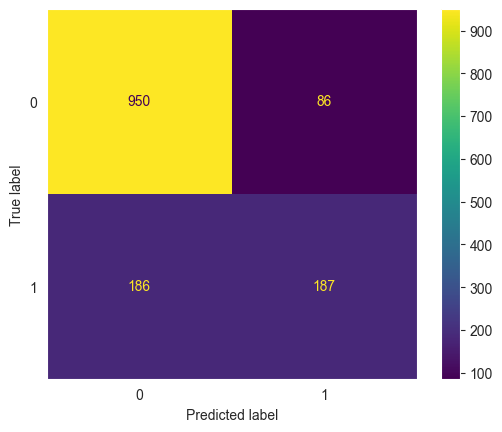

In [18]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()